In this notebook, we will explore 'Brest Cancer Dataset' and create a binary classification algorithm to detect cancer using PYCARET, a low-code open source machine learning library. Let's get started!

In [1]:
#Import Data from PYCARET Datasets

from pycaret.datasets import get_data
data = get_data('cancer')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


To import data from PYCARET datasets we can use command 'get_data', which also displays top 5 rows after fetching it for us. We have 10 variables and the 'Class' variable is the target variable and uses a binary value to indicate presence of cancer. let's explore the dataset!

In [2]:
#Understanding dataset

print(data.describe())
data.info()

            Class         age   menopause  tumor-size   inv-nodes   node-caps  \
count  683.000000  683.000000  683.000000  683.000000  683.000000  683.000000   
mean     0.349927    4.442167    3.150805    3.215227    2.830161    3.234261   
std      0.477296    2.820761    3.065145    2.988581    2.864562    2.223085   
min      0.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      0.000000    2.000000    1.000000    1.000000    1.000000    2.000000   
50%      0.000000    4.000000    1.000000    1.000000    1.000000    2.000000   
75%      1.000000    6.000000    5.000000    5.000000    4.000000    4.000000   
max      1.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

        deg-malig      breast  breast-quad    irradiat  
count  683.000000  683.000000   683.000000  683.000000  
mean     3.544656    3.445095     2.869693    1.603221  
std      3.643857    2.449697     3.052666    1.732674  
min      1.000000    1.000000     1.000000

The dataset has 683 rows with  no missing values and the 9 predictor variables with scale of 1 to 10, this is perfect and we can move on to next steps! let's have a look at histogram of target variable to understand the proportion between 0's and 1's in the dataset.

In [3]:
#Histogram of target variable

data.hist('Class')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A5B4C68E08>]],
      dtype=object)

The histogram shows us that the target variable has approximately ratio of 40:60 for 1's and 0's, so we can go further in the process as this is good ratio of target variable for training a classification algorithm. Let's import classification module from PYCARET.

In [4]:
from pycaret.classification import *

The PyCaret classification module can be used for Binary or Multi-class classification problems. It has over 18 algorithms and 14 plots to analyze the performance of models.

Invoking setup() function is the first step involved in creating ML models using PYCARET, below is the synatx to use this function.

In [5]:
trail1 = setup(data = data, target = 'Class', session_id=119)

 
Setup Succesfully Completed!


Description,Value
session_id,119
Target Type,Binary
Original Data,"(683, 9)"
Sampled Data,"(683, 9)"
Sample %,1
Training Set,"(478, 9)"
Testing Set,"(205, 9)"


The setup() function initializes the environment in pycaret and is the first step in the process. It takes two mandatory parameters: a pandas dataframe and the name of the target column and it creates the transformation pipeline to prepare the data for modeling and deployment.

Setup function has additional parameters that helps us to perform pre-processing on the data, complete information on pre-processing with examples can be found here https://pycaret.org/preprocessing/. 

Once setup is complete, all the steps or process' we performed during setup will be saved/recorded with a session ID which is convenient to retrieve information when needed.

The setup function automatically split data into train and test, if the dataset is large, then it asks user to define test dataset size for convenience.

Now we are ready to train a machine learning algorithm, where should we start? with a basic logistic regression or complex XGBOOST model? Do we need to compare over accuracy or precision or both? We have our own terms in training an algorithm but in the process there are few steps that are common in the process that everyone of us follow, few of them are choosing or testing multiple ML algorithms, hyper-parameter tuning, comparing algorithms through evaluation metrics. What if invoking a single command will run all possible ML models based on the data and display them with their evaluation metric vales based on the task like classification, regression etc.? Kwel isn't it!

To reduce the down time in training ML algorithm and increase convenience PYCARET has a built-in function 'compare_models', it trains data on different machine learning algorithms with their default parameters and display results of evaluation metrics such as Accuracy, Recall, Precision, F1 Score and Kappa. Now its a piece of pie to compare different algorithms and make decisions on next steps.
More information can be found here https://pycaret.org/compare-models/

In [6]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.9727,0.9924,0.9574,0.9655,0.9603,0.9395
1,K Neighbors Classifier,0.9706,0.9875,0.9632,0.9544,0.9578,0.9352
2,Light Gradient Boosting Machine,0.9706,0.9935,0.9691,0.9489,0.9578,0.9352
3,CatBoost Classifier,0.9705,0.9919,0.9632,0.9548,0.9576,0.935
4,Naive Bayes,0.9686,0.9857,0.9938,0.9239,0.9571,0.9324
5,Gradient Boosting Classifier,0.9686,0.9931,0.9511,0.9593,0.9544,0.9304
6,Ada Boost Classifier,0.9622,0.9943,0.9452,0.948,0.9449,0.9161
7,Extreme Gradient Boosting,0.9601,0.9913,0.939,0.9471,0.9419,0.9115
8,Ridge Classifier,0.96,0,0.9206,0.9633,0.9399,0.91
9,Linear Discriminant Analysis,0.96,0.9938,0.9206,0.9633,0.9399,0.91


Above results states that Extra Trees Classifier performing best in our case. Sometimes, we use 2 or more evaluation metrics to make a selection of algorithm and this is exactly our case now. As we are trying to detect cancer, we should not just make decision on Accuracy itself. Precision and Recall are important as these metrics puts more weight to False Positives and False Negatives. In our case, we choose F1-score as a metric of choice; F1-score is the harmonic mean of precision and recall. 

This article https://medium.com/x8-the-ai-community/understanding-ml-evaluation-metrics-precision-recall-2b3fb915b666 has good explanation on these evaluation metrics.

Let's train Extra Trees Classifier algorithm using create_model function. To avoid over-fitting, this function uses 10-fold cross validation method and displays results of evaluation metrics.

In [7]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9592,0.9945,0.9412,0.9412,0.9412,0.9099
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9583,0.9848,1.0000,0.8947,0.9444,0.9113
3,0.9792,0.9687,0.9412,1.0000,0.9697,0.9538
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9792,0.9962,1.0000,0.9444,0.9714,0.9551
6,0.9792,0.9991,0.9412,1.0000,0.9697,0.9538
7,0.9574,1.0000,0.8750,1.0000,0.9333,0.9023
8,0.9362,0.9859,0.8750,0.9333,0.9032,0.8557
9,0.9787,0.9950,1.0000,0.9412,0.9697,0.9533


To improve our model further, we can tune hyper-parameters using 'tune_model' function. We can also optimize tuning based on an evaluation metric. As our choice of metric is F1-score, let's optimize our algorithm!

In [8]:
tuned_et = tune_model('et', optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9796,0.9926,1.0000,0.9444,0.9714,0.9556
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9583,0.9791,1.0000,0.8947,0.9444,0.9113
3,0.9792,1.0000,0.9412,1.0000,0.9697,0.9538
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9792,0.9924,1.0000,0.9444,0.9714,0.9551
6,0.9792,1.0000,1.0000,0.9444,0.9714,0.9551
7,0.9787,1.0000,0.9375,1.0000,0.9677,0.9519
8,0.9149,0.9859,0.8750,0.8750,0.8750,0.8105
9,0.9574,0.9940,1.0000,0.8889,0.9412,0.9080


Our evaluation metric F1-score got improved a little with tuning, wondering what are the parameters for our algorithm, here we go!

In [9]:
print(tuned_et)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                     max_depth=20, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
                     oob_score=False, random_state=119, verbose=0,
                     warm_start=False)


Visualizing a model provides us with a valuable information, as we mentioned earlier that PYCARET classification module can plot upto 14 visualizations that helps us to understand explain our machine learning algorithm using 'plot_model' function. Wanted to see what features are important or confusion matrix then lets go!
more info can be found here https://pycaret.org/plot-model/


In [10]:
plot_model(tuned_et, plot = 'parameter')

,Parameters
bootstrap,False
class_weight,None
criterion,entropy
max_depth,20
max_features,auto
max_leaf_nodes,None
min_impurity_decrease,0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,9


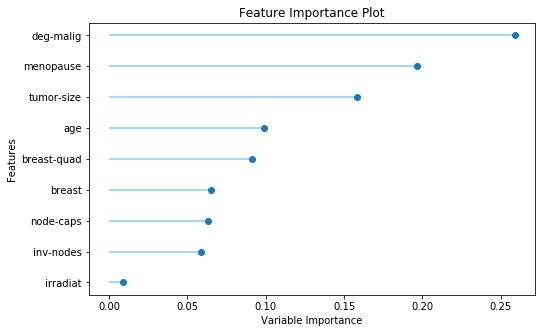

In [11]:
plot_model(tuned_et, plot='feature')

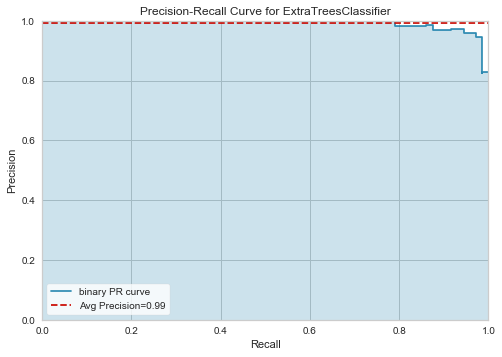

In [12]:
plot_model(tuned_et, plot='pr')

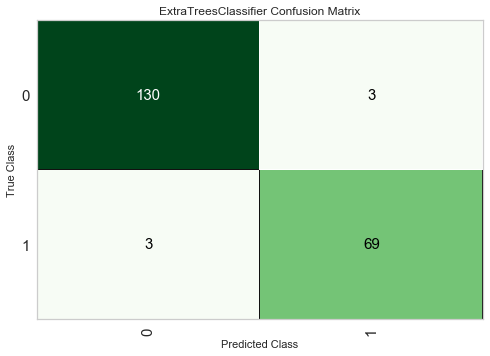

In [13]:
plot_model(tuned_et, plot = 'confusion_matrix')

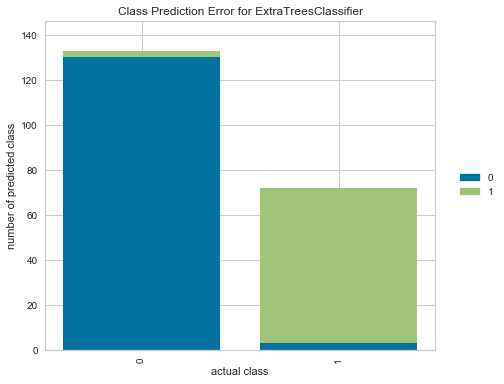

In [14]:
plot_model(tuned_et, plot = 'error')

The plot function takes trained model and uses test dataset made during setup phase; this gives us results on unseen data by algorithm during training. With the above plots, we can interpret and evaluate our algorithms and explain results.

Now, we trained a model and let's detect cancer on test data and check the performance through evaluation metrics.

In [15]:
predictions1 = predict_model(tuned_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.9707,0.9957,0.9583,0.9583,0.9583,0.9358


The above results show that our classification algorithm doing a good job! The next step in the process is creating a final model.

The finalize_model() function fits the model onto the complete dataset. The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [16]:
final_model = finalize_model(tuned_et)
print(final_model)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                     max_depth=20, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
                     oob_score=False, random_state=119, verbose=0,
                     warm_start=False)


We now have a final model that detects breast cancer. Also, PYCARET's inbuilt function save_model() allows you to save the model along with entire transformation pipeline for later use.

In [17]:
save_model(final_model,'Final ETC Model 24APR2020')

Model Succesfully Saved


We can load our final model or load it in a different environment for later use. This ends our process of creating a cancer detection model using PYCARET.

Thanks for reading!!

For more information on PYCARET visit:
GITHUB : https://github.com/pycaret/pycaret
WEBSITE: https://www.pycaret.org